In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
x = dataset[["type_school","school_accreditation","gender","interest","residence","parent_age","parent_salary","house_area","average_grades","in_college"]]
y = dataset["parent_was_in_college"]

In [4]:
lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()

In [5]:
x.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False


In [6]:
pd.options.mode.chained_assignment = None
def transform_categorical(x):
    x["type_school"] = lb.fit_transform(x["type_school"])
    x["school_accreditation"] = lb.fit_transform(x["school_accreditation"])
    x["gender"] = lb.fit_transform(x["gender"])
    x["residence"] = lb.fit_transform(x["residence"])
    x["in_college"] = lb.fit_transform(x["in_college"])
    x["interest"] = le.fit_transform(x["interest"])
    


In [7]:
transform_categorical(x)

In [8]:
x.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,in_college
0,0,0,1,0,1,56,6950000,83.0,84.09,1
1,0,0,1,0,1,57,4410000,76.8,86.91,1
2,0,1,0,4,1,50,6500000,80.6,87.43,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0


In [9]:
y = lb.fit_transform(y)
y = column_or_1d(y)


Vamos utilizar o label encoder para somente uma coluna, a de interresse, visto que ele pode classificar 

Na linha acima binarizamos a linha que continha true e false, assim podemos treinar com mais facilidade.

Iremos utilizar os 8 mil primeiros rows como training data e os outros 2k como teste.

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(x.astype(np.float64))

In [11]:
x_train,x_test,y_train,y_test = x[:800],x[800:],y[:800],y[800:]

In [12]:
sgd_clf = LinearSVC(random_state=42)
sgd_clf.fit(x_train,y_train)

LinearSVC(random_state=42)

Vamos tentar gerar uma confusion matrix para ter certeza que o modelo está funcionando corretamente.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


In [14]:
y_train_pred = cross_val_predict(sgd_clf, x_train,y_train,cv=3)
confusion_matrix(y_train,y_train_pred)

array([[311,  73],
       [ 66, 350]], dtype=int64)

In [15]:
precision_score(y_train,y_train_pred)

0.8274231678486997

In [16]:
recall_score(y_train,y_train_pred)

0.8413461538461539

Agora, vamos plotar o gráfico de precision x recall

In [20]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf,x_train,y_train,cv=3,method="decision_function")
precisions,recalls,thresholds = precision_recall_curve(y_train,y_scores)

In [21]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds,recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="lower left")

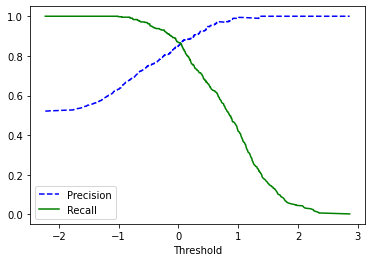

In [22]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [23]:
from sklearn.metrics import roc_curve

In [24]:
fpr,tpr, thresholds = roc_curve(y_train,y_scores)

In [26]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.axis([0,1,0,1])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
    

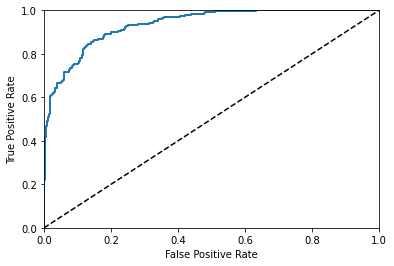

In [27]:
plot_roc_curve(fpr,tpr)